In [1]:
import rasterio as rio
from rasterio.merge import merge
import os
import glob
import matplotlib.pyplot as plt
import rioxarray as rxr
import numpy as np


In [9]:
IDir = r'/Volumes/PhD/imagery/masters/output/MSM1/'
ODir = r'/Volumes/PhD/imagery/masters/output/global/'

In [ ]:
#Search terms and imagery grab
sc = ['*12mmhr*', '*16mmhr*', '*20mmhr*', '*24mmhr*', '*28mmhr*', '*32mmhr*', '*36mmhr*', '*40mmhr*']
#sc = ['*4mmhr*', '*8mmhr*', '*44mmhr*', '*48mmhr*', '*52mmhr*', '*56mmhr*', '*60mmhr*']
for x in sc:
    search_criteria = x
    raster_join = os.path.join(IDir, search_criteria)
    rasters = glob.glob(raster_join)
    

12mmhr
['/Volumes/PhD/imagery/masters/output/MSM1/10009_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10048_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10058_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10060_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10104_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10107_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10109_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10155_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10194_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10225_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10242_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10245_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10270_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10295_MSM1_12mmhr.tif', '/Volumes/PhD/imagery/masters/output/MSM1/10346_MSM1_12mmhr.tif', '/

In [ ]:
#Open imagery

mosaic_files = []
for file in rasters:
    image = rio.open(file)
    mosaic_files.append(image)


[]


In [5]:
#Complete merge and save imagery

mosaic, out_trans = merge(mosaic_files, nodata = 0)
mosaic = np.where(mosaic == 0, np.nan, mosaic)

out_meta = image.meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "crs": image.crs,
    "nodata": np.nan
})
name = f'{ODir}global_MSM1_24mmhr.tif'
with rio.open(name, "w", **out_meta) as dest:
    dest.write(mosaic)

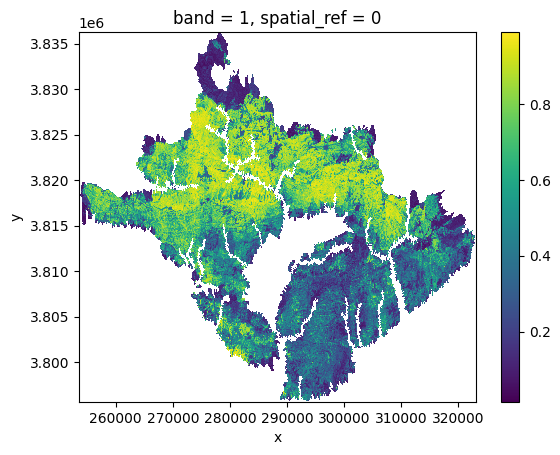

In [6]:
test = rxr.open_rasterio(r'D:/imagery/masters/output/global/global_MSM1_24mmhr.tif')
test.plot()
#plt.close()